In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import numpy as np

In [24]:
def normalise(signal1, signal2, MVC_M1_SCALED, MVC_M2_SCALED):
    s1_normal = int(signal1/MVC_M1_SCALED *100)
    # if s1_normal > 100:
    #     s1_normal = 100
    s2_normal = int(signal2/MVC_M2_SCALED *100)
    # if s2_normal > 100:
    #     s2_normal = 100

    return s1_normal, s2_normal

def find_rest_data(emg1, emg2):
    flex_x = []
    flex_y = []
    for i in range(len(emg1)):
        if emg1[i] < 20 and emg2[i] < 20:
            flex_x.append(emg1[i])
            flex_y.append(emg2[i])
    return flex_x, flex_y



def find_flex_data(emg1, emg2):
    flex_x = []
    flex_y = []
    for i in range(len(emg1)):
        if emg2[i] > emg1[i]:
            flex_x.append(emg1[i])
            flex_y.append(emg2[i])
    return flex_x, flex_y


def find_ex_data(emg1, emg2):
    ex_x = []
    ex_y = []
    for i in range(len(emg2)):
        if emg1[i] > emg2[i]:
            ex_x.append(emg1[i])
            ex_y.append(emg2[i])
    return ex_x, ex_y

# Subject 1, age: 26

open the files and create lists

In [25]:
# MVC,205,MVC,259

MVC_M1 = 205
MVC_M2 = 259
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\sub1_raw_nofeedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\sub1_raw_feedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No Feedback

slope flex: 2.69679650605772, y axis flex: 0
slope ex: 0.25307230432044636, y axis ex: 0


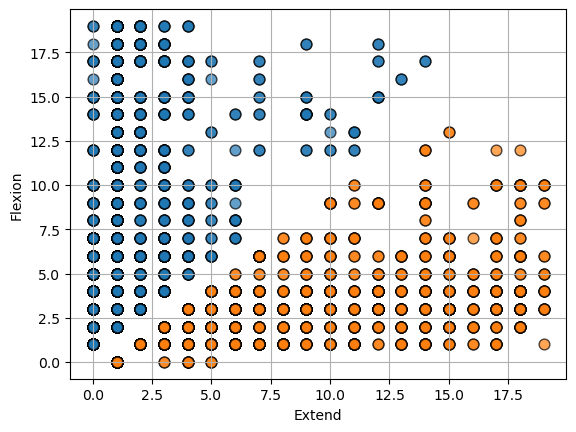

In [26]:
# find resting data. emg signal below 30
emg1_rest, emg2_rest = find_rest_data(emg1_norm, emg2_norm)

# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_rest, emg2_rest)
ex_x, ex_y = find_ex_data(emg1_rest, emg2_rest)


# change lists to numpy array for the polyfit
# NO FB
sub1_flex_x = np.array(flex_x)
sub1_flex_y = np.array(flex_y)
sub1_ex_x = np.array(ex_x)
sub1_ex_y = np.array(ex_y)

#find line of best fit
# NO FB
sub1_a, sub1_b = np.polyfit(sub1_flex_x, sub1_flex_y, 1)
sub1_b = 0
print(f"slope flex: {sub1_a}, y axis flex: {sub1_b}")
sub1_c, sub1_d = np.polyfit(sub1_ex_x, sub1_ex_y, 1)
sub1_d = 0
print(f"slope ex: {sub1_c}, y axis ex: {sub1_d}")


#add points to plot
plt.scatter(sub1_flex_x, sub1_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub1_ex_x,   sub1_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub1_xseq_flex = np.linspace(0, max(sub1_flex_x), num=100)
# plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub1_xseq_ex = np.linspace(0, max(sub1_ex_x), num=100)
# plt.plot(sub1_xseq_ex, sub1_c*sub1_xseq_ex+sub1_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 2.69679650605772, feedback, y axis flex: 0
feedback, slope ex: 0.34379601756068356, feedback, y axis flex: 0


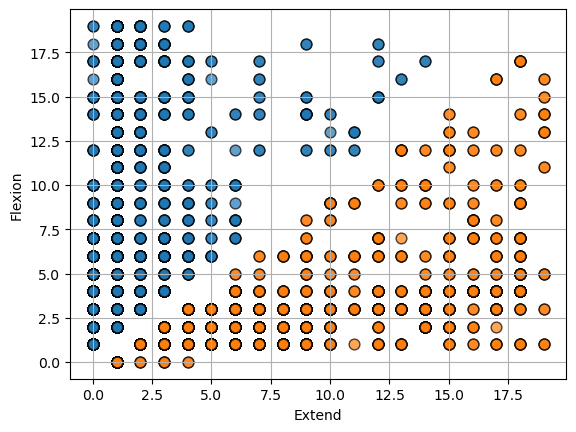

In [27]:
# find resting data. emg signal below 30
emg1_rest_feed, emg2_rest_feed = find_rest_data(emg1_norm_feed, emg2_norm_feed)

# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_rest_feed, emg2_rest_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_rest_feed, emg2_rest_feed)
      

# WITH FB, create numpy arrays
sub1_flex_x_feed = np.array(flex_x)
sub1_flex_y_feed = np.array(flex_y)
sub1_ex_x_feed = np.array(ex_x_feed)
sub1_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# WITH FB
sub1_a_feed, sub1_b_feed = np.polyfit(sub1_flex_x_feed, sub1_flex_y_feed, 1)
sub1_b_feed = 0
print(f"feedback, slope flex: {sub1_a_feed}, feedback, y axis flex: {sub1_b_feed}")
sub1_c_feed, sub1_d_feed = np.polyfit(sub1_ex_x_feed, sub1_ex_y_feed, 1)
sub1_d_feed = 0
print(f"feedback, slope ex: {sub1_c_feed}, feedback, y axis flex: {sub1_d_feed}")

plt.scatter(sub1_flex_x_feed, sub1_flex_y_feed, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub1_ex_x_feed, sub1_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub1_xseq_flex_feed = np.linspace(0, max(sub1_flex_x_feed), num=100)
# plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub1_xseq_ex_feed = np.linspace(0, max(sub1_ex_x_feed), num=100)
# plt.plot(sub1_xseq_ex_feed, sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

In [28]:

# Subject 1
# # without feedback
# plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='b',  alpha = 0.6, linewidth = 2)
# plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color='b' , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
# plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color='r' , alpha = 0.6 , linewidth = 2)

# plt.grid()
# plt.show() 

# Subject 2, age: 27

In [29]:
# MVC,260,MVC,239

MVC_M1 = 260
MVC_M2 = 239
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\sub2_raw_nofeedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\sub2_raw_feedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

slope flex: 2.474502373773757, y axis flex: 0
slope ex: 0.04262414454061631, y axis ex: 0


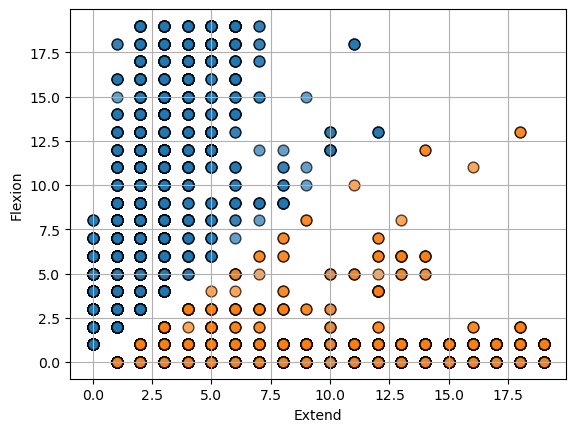

In [30]:
# find resting data. emg signal below 30
emg1_rest, emg2_rest = find_rest_data(emg1_norm, emg2_norm)

# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_rest, emg2_rest)
ex_x, ex_y = find_ex_data(emg1_rest, emg2_rest)

# filter outliers for flexion
flex_x_filter = []
flex_y_filter = []
for i in range(len(flex_x)):
    if (flex_x[i] > 20 and flex_y[i] < 55):
        pass
    else:
        flex_x_filter.append(flex_x[i])
        flex_y_filter.append(flex_y[i])
# filter outliers for extension
ex_x_filter = []
ex_y_filter = []
for i in range(len(ex_x)):
    if (ex_x[i] > 15 and ex_y[i] > 15):
        pass
    else:
        ex_x_filter.append(ex_x[i])
        ex_y_filter.append(ex_y[i])

# change lists to numpy array for the polyfit
# NO FB
sub2_flex_x = np.array(flex_x_filter)
sub2_flex_y = np.array(flex_y_filter)
sub2_ex_x = np.array(ex_x_filter)
sub2_ex_y = np.array(ex_y_filter)

#find line of best fit
# NO FB
sub2_a, sub2_b = np.polyfit(sub2_flex_x, sub2_flex_y, 1)
sub2_b = 0
print(f"slope flex: {sub2_a}, y axis flex: {sub2_b}")
sub2_c, sub2_d = np.polyfit(sub2_ex_x, sub2_ex_y, 1)
sub2_d = 0
print(f"slope ex: {sub2_c}, y axis ex: {sub2_d}")


#add points to plot
plt.scatter(sub2_flex_x, sub2_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub2_ex_x,   sub2_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub2_xseq_flex = np.linspace(0, 27, num=100)
# plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub2_xseq_ex = np.linspace(0, max(sub2_ex_x), num=100)
# plt.plot(sub2_xseq_ex, sub2_c*sub2_xseq_ex+sub2_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 2.7485160283454424, feedback, y axis flex: 0
feedback, slope ex: 0.03270801345760398, feedback, y axis flex: 0


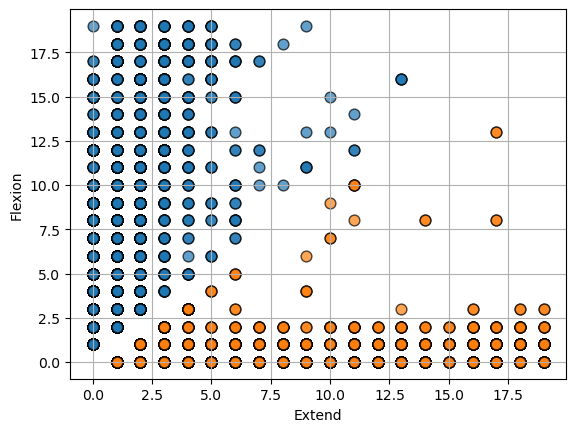

In [31]:
# find resting data. emg signal below 30
emg1_rest_feed, emg2_rest_feed = find_rest_data(emg1_norm_feed, emg2_norm_feed)

# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_rest_feed, emg2_rest_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_rest_feed, emg2_rest_feed)
      

# WITH FB, create numpy arrays
sub2_flex_x_feed = np.array(flex_x_feed)
sub2_flex_y_feed = np.array(flex_y_feed)
sub2_ex_x_feed = np.array(ex_x_feed)
sub2_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# WITH FB
sub2_a_feed, sub2_b_feed = np.polyfit(sub2_flex_x_feed, sub2_flex_y_feed, 1)
sub2_b_feed = 0
print(f"feedback, slope flex: {sub2_a_feed}, feedback, y axis flex: {sub2_b_feed}")
sub2_c_feed, sub2_d_feed = np.polyfit(sub2_ex_x_feed, sub2_ex_y_feed, 1)
sub2_d_feed = 0
print(f"feedback, slope ex: {sub2_c_feed}, feedback, y axis flex: {sub2_d_feed}")

plt.scatter(sub2_flex_x_feed, sub2_flex_y_feed,   s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub2_ex_x_feed,   sub2_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub2_xseq_flex_feed = np.linspace(0, 24, num=100)
# plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub2_xseq_ex_feed = np.linspace(0, max(sub2_ex_x_feed), num=100)
# plt.plot(sub2_xseq_ex_feed, sub2_c_feed*sub2_xseq_ex_feed+sub2_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

In [32]:
# # Subject 1
# # without feedback
# plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='b',  alpha = 0.6, linewidth = 2)
# plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color='b' , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
# plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color='r' , alpha = 0.6 , linewidth = 2)

# # Subject 2
# # without feedback
# plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color='b',  alpha = 0.6, linewidth = 2)
# plt.plot(sub2_xseq_ex,   sub2_c*sub2_xseq_ex  +sub2_d, color='b' , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
# plt.plot(sub2_xseq_ex_feed,   sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

# plt.grid()
# plt.show() 

# Subject 3, Age: 26

In [33]:
# MVC,150,MVC,340

MVC_M1 = 150
MVC_M2 = 340
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\sub3_raw_nofeedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\sub3_raw_feedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

slope flex: 1.6631710440821585, y axis flex: 0
slope ex: 0.23509942463399722, y axis ex: 0


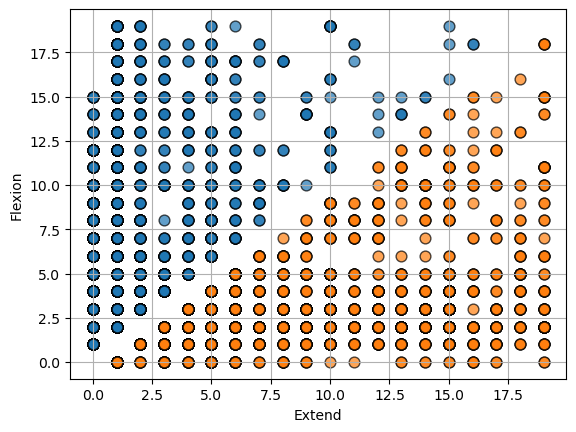

In [34]:
# find resting data. emg signal below 30
emg1_rest, emg2_rest = find_rest_data(emg1_norm, emg2_norm)

# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_rest, emg2_rest)
ex_x, ex_y = find_ex_data(emg1_rest, emg2_rest)


# change lists to numpy array for the polyfit
# NO FB
sub3_flex_x = np.array(flex_x)
sub3_flex_y = np.array(flex_y)
sub3_ex_x = np.array(ex_x)
sub3_ex_y = np.array(ex_y)

#find line of best fit
# NO FB
sub3_a, sub3_b = np.polyfit(sub3_flex_x, sub3_flex_y, 1)
sub3_b = 0
print(f"slope flex: {sub3_a}, y axis flex: {sub3_b}")
sub3_c, sub3_d = np.polyfit(sub3_ex_x, sub3_ex_y, 1)
sub3_d = 0
print(f"slope ex: {sub3_c}, y axis ex: {sub3_d}")


#add points to plot
plt.scatter(sub3_flex_x, sub3_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub3_ex_x,   sub3_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub3_xseq_flex = np.linspace(0, 59, num=100)
# plt.plot(sub3_xseq_flex, sub3_a*sub3_xseq_flex+sub3_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub3_xseq_ex = np.linspace(0, max(sub3_ex_x), num=100)
# plt.plot(sub3_xseq_ex, sub3_c*sub3_xseq_ex+sub3_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 1.5566583246529488, feedback, y axis flex: 0
feedback, slope ex: 0.5272455819043915, feedback, y axis flex: 0


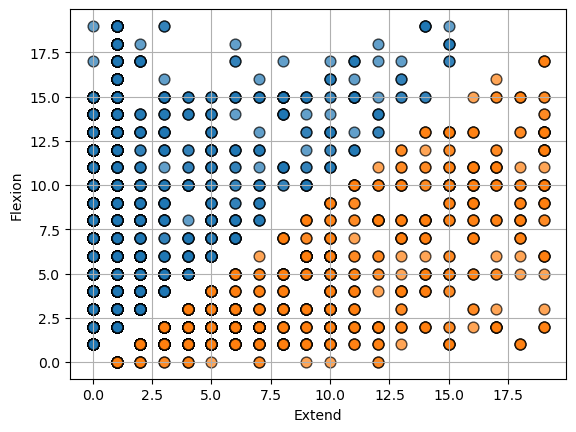

In [35]:
# find resting data. emg signal below 30
emg1_rest_feed, emg2_rest_feed = find_rest_data(emg1_norm_feed, emg2_norm_feed)

# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_rest_feed, emg2_rest_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_rest_feed, emg2_rest_feed)
      
# WITH FB, create numpy arrays
sub3_flex_x_feed = np.array(flex_x_feed)
sub3_flex_y_feed = np.array(flex_y_feed)
sub3_ex_x_feed = np.array(ex_x_feed)
sub3_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# WITH FB
sub3_a_feed, sub3_b_feed = np.polyfit(sub3_flex_x_feed, sub3_flex_y_feed, 1)
sub3_b_feed = 0
print(f"feedback, slope flex: {sub3_a_feed}, feedback, y axis flex: {sub3_b_feed}")
sub3_c_feed, sub3_d_feed = np.polyfit(sub3_ex_x_feed, sub3_ex_y_feed, 1)
sub3_d_feed = 0
print(f"feedback, slope ex: {sub3_c_feed}, feedback, y axis flex: {sub3_d_feed}")

plt.scatter(sub3_flex_x_feed, sub3_flex_y_feed,   s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub3_ex_x_feed,   sub3_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub3_xseq_flex_feed = np.linspace(0, 38, num=100)
# plt.plot(sub3_xseq_flex_feed, sub3_a_feed*sub3_xseq_flex_feed+sub3_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub3_xseq_ex_feed = np.linspace(0, max(sub3_ex_x_feed), num=100)
# plt.plot(sub3_xseq_ex_feed, sub3_c_feed*sub3_xseq_ex_feed+sub3_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

In [36]:
# # Subject 1
# # without feedback
# plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='b',  alpha = 0.6, linewidth = 2)
# plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color='b' , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
# plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color='r' , alpha = 0.6 , linewidth = 2)

# # Subject 2
# # without feedback
# plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color='b',  alpha = 0.6, linewidth = 2)
# plt.plot(sub2_xseq_ex,   sub2_c*sub2_xseq_ex  +sub2_d, color='b' , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
# plt.plot(sub2_xseq_ex_feed,   sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

# # Subject 3
# # without feedback
# plt.plot(sub3_xseq_flex, sub3_a*sub3_xseq_flex+sub3_b, color='b',  alpha = 0.6, linewidth = 2)
# plt.plot(sub3_xseq_ex,   sub3_c*sub3_xseq_ex  +sub3_d, color='b' , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub3_xseq_flex_feed, sub3_a_feed*sub3_xseq_flex_feed+sub3_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
# plt.plot(sub3_xseq_ex_feed,   sub3_c_feed*sub3_xseq_ex_feed  +sub3_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

# plt.grid()
# plt.show() 

# Subject 4, Age: 25

In [37]:
# MVC,180,MVC,400

MVC_M1 = 180
MVC_M2 = 400
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\sub4_raw_nofeedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\sub4_raw_feedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

slope flex: 2.5442852814025496, y axis flex: 0
slope ex: 0.04549188458786735, y axis ex: 0


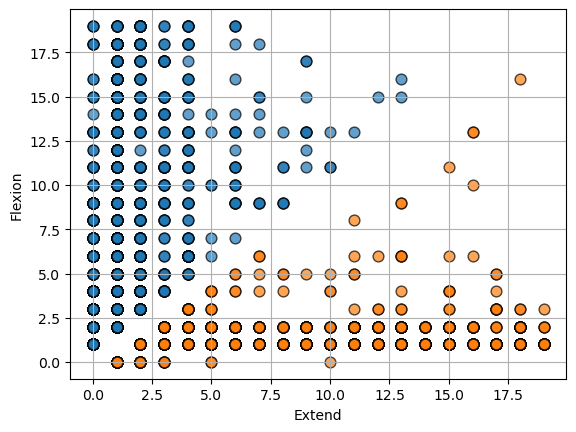

In [38]:
# find resting data. emg signal below 30
emg1_rest, emg2_rest = find_rest_data(emg1_norm, emg2_norm)

# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_rest, emg2_rest)
ex_x, ex_y = find_ex_data(emg1_rest, emg2_rest)


# change lists to numpy array for the polyfit
# NO FB
sub4_flex_x = np.array(flex_x)
sub4_flex_y = np.array(flex_y)
sub4_ex_x = np.array(ex_x)
sub4_ex_y = np.array(ex_y)

#find line of best fit
# NO FB
sub4_a, sub4_b = np.polyfit(sub4_flex_x, sub4_flex_y, 1)
sub4_b = 0
print(f"slope flex: {sub4_a}, y axis flex: {sub4_b}")
sub4_c, sub4_d = np.polyfit(sub4_ex_x, sub4_ex_y, 1)
sub4_d = 0
print(f"slope ex: {sub4_c}, y axis ex: {sub4_d}")


#add points to plot
plt.scatter(sub4_flex_x, sub4_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub4_ex_x,   sub4_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub4_xseq_flex = np.linspace(0, 24, num=100)
# plt.plot(sub4_xseq_flex, sub4_a*sub4_xseq_flex+sub4_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub4_xseq_ex = np.linspace(0, max(sub4_ex_x), num=100)
# plt.plot(sub4_xseq_ex, sub4_c*sub4_xseq_ex+sub4_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 2.561807824884522, feedback, y axis flex: 0
feedback, slope ex: 0.05203388144777122, feedback, y axis flex: 0


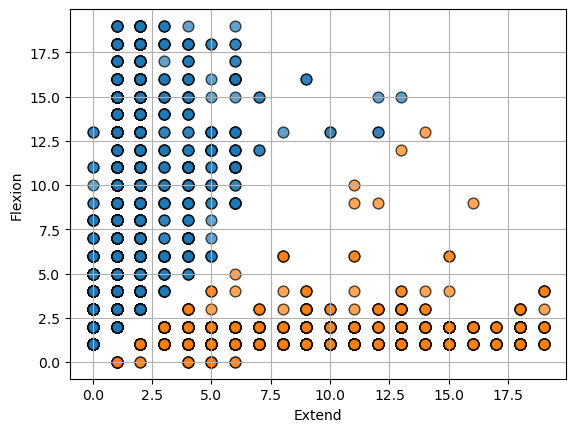

In [39]:
# find resting data. emg signal below 30
emg1_rest_feed, emg2_rest_feed = find_rest_data(emg1_norm_feed, emg2_norm_feed)

# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_rest_feed, emg2_rest_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_rest_feed, emg2_rest_feed)
      

# WITH FB, create numpy arrays
sub4_flex_x_feed = np.array(flex_x_feed)
sub4_flex_y_feed = np.array(flex_y_feed)
sub4_ex_x_feed = np.array(ex_x_feed)
sub4_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# WITH FB
sub4_a_feed, sub4_b_feed = np.polyfit(sub4_flex_x_feed, sub4_flex_y_feed, 1)
sub4_b_feed = 0
print(f"feedback, slope flex: {sub4_a_feed}, feedback, y axis flex: {sub4_b_feed}")
sub4_c_feed, sub4_d_feed = np.polyfit(sub4_ex_x_feed, sub4_ex_y_feed, 1)
sub4_d_feed = 0
print(f"feedback, slope ex: {sub4_c_feed}, feedback, y axis flex: {sub4_d_feed}")

plt.scatter(sub4_flex_x_feed, sub4_flex_y_feed,   s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub4_ex_x_feed,   sub4_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub4_xseq_flex_feed = np.linspace(0, 25, num=100)
# plt.plot(sub4_xseq_flex_feed, sub4_a_feed*sub4_xseq_flex_feed+sub4_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub4_xseq_ex_feed = np.linspace(0, max(sub4_ex_x_feed), num=100)
# plt.plot(sub4_xseq_ex_feed, sub4_c_feed*sub4_xseq_ex_feed+sub4_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

In [40]:
# # Subject 1
# # without feedback
# plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='b',  alpha = 0.6, linewidth = 2)
# plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color='b' , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
# plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color='r' , alpha = 0.6 , linewidth = 2)

# # Subject 2
# # without feedback
# plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color='b',  alpha = 0.6, linewidth = 2)
# plt.plot(sub2_xseq_ex,   sub2_c*sub2_xseq_ex  +sub2_d, color='b' , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
# plt.plot(sub2_xseq_ex_feed,   sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

# # Subject 3
# # without feedback
# plt.plot(sub3_xseq_flex, sub3_a*sub3_xseq_flex+sub3_b, color='b',  alpha = 0.6, linewidth = 2)
# plt.plot(sub3_xseq_ex,   sub3_c*sub3_xseq_ex  +sub3_d, color='b' , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub3_xseq_flex_feed, sub3_a_feed*sub3_xseq_flex_feed+sub3_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
# plt.plot(sub3_xseq_ex_feed,   sub3_c_feed*sub3_xseq_ex_feed  +sub3_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

# # Subject 4
# # without feedback
# plt.plot(sub4_xseq_flex, sub4_a*sub4_xseq_flex+sub4_b, color='b',  alpha = 0.6, linewidth = 2)
# plt.plot(sub4_xseq_ex,   sub4_c*sub4_xseq_ex  +sub4_d, color='b' , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub4_xseq_flex_feed, sub4_a_feed*sub4_xseq_flex_feed+sub4_b_feed, color='r' , alpha = 0.6 , linewidth = 2)
# plt.plot(sub4_xseq_ex_feed,   sub4_c_feed*sub4_xseq_ex_feed  +sub4_d_feed, color='r' , alpha = 0.6 , linewidth = 2)

# plt.grid()
# plt.show() 

# Subject 5, Age: 24

In [41]:
# MVC,124,MVC,350

MVC_M1 = 124
MVC_M2 = 350
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\sub5_raw_nofeedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\sub5_raw_feedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

slope flex: 2.863391287185646, y axis flex: 0
slope ex: 0.13348217816724292, y axis ex: 0


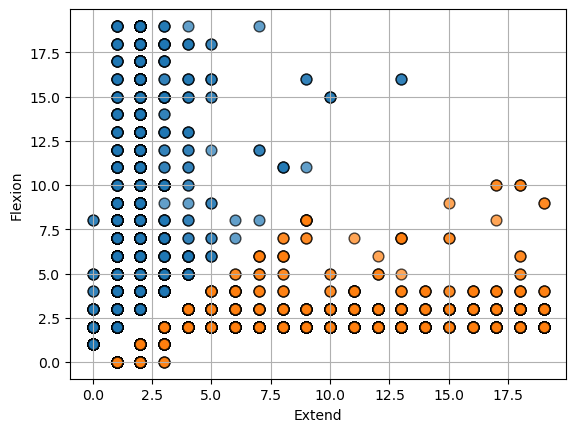

In [42]:
# find resting data. emg signal below 30
emg1_rest, emg2_rest = find_rest_data(emg1_norm, emg2_norm)

# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_rest, emg2_rest)
ex_x, ex_y = find_ex_data(emg1_rest, emg2_rest)

# filter outliers for flexion
flex_x_filter = []
flex_y_filter = []
for i in range(len(flex_x)):
    if (flex_x[i] > 40 and flex_y[i] < 200):
        pass
    else:
        flex_x_filter.append(flex_x[i])
        flex_y_filter.append(flex_y[i])

# filter outliers for extension
ex_x_filter = []
ex_y_filter = []
for i in range(len(ex_x)):
    if (ex_x[i] > 100 and ex_y[i] > 50):
        pass
    else:
        ex_x_filter.append(ex_x[i])
        ex_y_filter.append(ex_y[i])

# change lists to numpy array for the polyfit
# NO FB
sub5_flex_x = np.array(flex_x_filter)
sub5_flex_y = np.array(flex_y_filter)
sub5_ex_x = np.array(ex_x_filter)
sub5_ex_y = np.array(ex_y_filter)

#find line of best fit
# NO FB
sub5_a, sub5_b = np.polyfit(sub5_flex_x, sub5_flex_y, 1)
sub5_b = 0
print(f"slope flex: {sub5_a}, y axis flex: {sub5_b}")
sub5_c, sub5_d = np.polyfit(sub5_ex_x, sub5_ex_y, 1)
sub5_d = 0
print(f"slope ex: {sub5_c}, y axis ex: {sub5_d}")


#add points to plot
plt.scatter(sub5_flex_x, sub5_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub5_ex_x,   sub5_ex_y,   s=60, alpha=0.7, edgecolors="k")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub5_xseq_flex = np.linspace(0,42, num=100)
# plt.plot(sub5_xseq_flex, sub5_a*sub5_xseq_flex+sub5_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub5_xseq_ex = np.linspace(0, max(sub5_ex_x), num=100)
# plt.plot(sub5_xseq_ex, sub5_c*sub5_xseq_ex+sub5_d, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

feedback, slope flex: 2.7569444096580864, feedback, y axis flex: 0
feedback, slope ex: 0.14333451478411413, feedback, y axis flex: 0


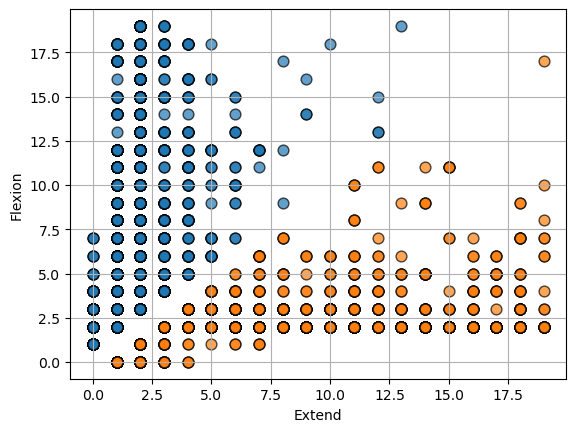

In [43]:
# find resting data. emg signal below 30
emg1_rest_feed, emg2_rest_feed = find_rest_data(emg1_norm_feed, emg2_norm_feed)

# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_rest_feed, emg2_rest_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_rest_feed, emg2_rest_feed)
      

# WITH FB, create numpy arrays
sub5_flex_x_feed = np.array(flex_x_feed)
sub5_flex_y_feed = np.array(flex_y_feed)
sub5_ex_x_feed = np.array(ex_x_feed)
sub5_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (a) and intercept (b)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# WITH FB
# find line of best fit
# WITH FB
sub5_a_feed, sub5_b_feed = np.polyfit(sub5_flex_x_feed, sub5_flex_y_feed, 1)
sub5_b_feed = 0
print(f"feedback, slope flex: {sub5_a_feed}, feedback, y axis flex: {sub5_b_feed}")
sub5_c_feed, sub5_d_feed = np.polyfit(sub5_ex_x_feed, sub5_ex_y_feed, 1)
sub5_d_feed = 0
print(f"feedback, slope ex: {sub5_c_feed}, feedback, y axis flex: {sub5_d_feed}")

plt.scatter(sub5_flex_x_feed, sub5_flex_y_feed,   s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub5_ex_x_feed,   sub5_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# Create sequence of 100 numbers from 0 to max value
sub5_xseq_flex_feed = np.linspace(0, 40, num=100)
# plt.plot(sub5_xseq_flex_feed, sub5_a_feed*sub5_xseq_flex_feed+sub5_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub5_xseq_ex_feed = np.linspace(0, max(sub5_ex_x_feed), num=100)
# plt.plot(sub5_xseq_ex_feed, sub5_c_feed*sub5_xseq_ex_feed+sub5_d_feed, color='y')

plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Plot together

In [44]:
# # Subject 1
# # without feedback
# plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color=(0, 0.7, 0),  alpha = 0.6, linewidth = 2)
# plt.plot(sub1_xseq_ex,   sub1_c*sub1_xseq_ex+sub1_d,   color=(0, 0.7, 0) , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color=(0, 0.7, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')
# plt.plot(sub1_xseq_ex_feed,   sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed,   color=(0, 0.7, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')

# # Subject 2
# # without feedback
# plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color=(0, 0, 0.7),  alpha = 0.6, linewidth = 2)
# plt.plot(sub2_xseq_ex,   sub2_c*sub2_xseq_ex  +sub2_d, color=(0, 0, 0.7) , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color=(0, 0, 0.7) , alpha = 0.6 , linewidth = 2, linestyle = '--')
# plt.plot(sub2_xseq_ex_feed,   sub2_c_feed*sub2_xseq_ex_feed  +sub2_d_feed, color=(0, 0, 0.7) , alpha = 0.6 , linewidth = 2, linestyle = '--')

# # Subject 3
# # without feedback
# plt.plot(sub3_xseq_flex, sub3_a*sub3_xseq_flex+sub3_b, color=(0.9, 0, 0.9),  alpha = 0.6, linewidth = 2)
# plt.plot(sub3_xseq_ex,   sub3_c*sub3_xseq_ex  +sub3_d, color=(0.9, 0, 0.9) , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub3_xseq_flex_feed, sub3_a_feed*sub3_xseq_flex_feed+sub3_b_feed, color=(0.9, 0, 0.9) , alpha = 0.6 , linewidth = 2, linestyle = '--')
# plt.plot(sub3_xseq_ex_feed,   sub3_c_feed*sub3_xseq_ex_feed  +sub3_d_feed, color=(0.9, 0, 0.9) , alpha = 0.6 , linewidth = 2, linestyle = '--')

# # Subject 4
# # without feedback
# plt.plot(sub4_xseq_flex, sub4_a*sub4_xseq_flex+sub4_b, color=(0, 0.75, 0.75),  alpha = 0.6, linewidth = 2)
# plt.plot(sub4_xseq_ex,   sub4_c*sub4_xseq_ex  +sub4_d, color=(0, 0.75, 0.75) , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub4_xseq_flex_feed, sub4_a_feed*sub4_xseq_flex_feed+sub4_b_feed, color=(0, 0.75, 0.75) , alpha = 0.6 , linewidth = 2, linestyle = '--')
# plt.plot(sub4_xseq_ex_feed,   sub4_c_feed*sub4_xseq_ex_feed  +sub4_d_feed, color=(0, 0.75, 0.75) , alpha = 0.6 , linewidth = 2, linestyle = '--')

# # Subject 5
# # without feedback
# plt.plot(sub5_xseq_flex, sub5_a*sub5_xseq_flex+sub5_b, color=(0.75, 0.75, 0),  alpha = 0.6, linewidth = 2)
# plt.plot(sub5_xseq_ex,   sub5_c*sub5_xseq_ex  +sub5_d, color=(0.75, 0.75, 0) , alpha = 0.6, linewidth = 2)
# # with feedback
# plt.plot(sub5_xseq_flex_feed, sub5_a_feed*sub5_xseq_flex_feed+sub5_b_feed, color=(0.75, 0.75, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')
# plt.plot(sub5_xseq_ex_feed,   sub5_c_feed*sub5_xseq_ex_feed  +sub5_d_feed, color=(0.75, 0.75, 0) , alpha = 0.6 , linewidth = 2, linestyle = '--')

# plt.grid()
# plt.xlim(0,100)
# plt.ylim(0,100)
# plt.title('Healthy subjects no FB/with FB')
# plt.xlabel('Extension')
# plt.ylabel('Flexion')
# plt.legend(['sub:1', '_None', 'sub:1 FB', '_None', 'sub:2', '_None', 'sub:2 FB', '_None' , 'sub:3', '_None', 'sub:3 FB', '_None' , 'sub:4', '_None', 'sub4: FB', '_None' , 'sub:5', '_None', 'sub:5 FB', '_None']) 
# plt.show() 